In [48]:
import numpy as np
import pandas as pd

from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv('German Credit card.csv')

In [50]:
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,none,...,real estate,31,none,own,1,unskilled - resident,1,no,yes,1
996,... < 100 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,none,...,building society savings agreement/life insurance,40,none,own,1,management/self-employed/highly qualified empl...,1,yes,yes,1
997,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,... >= 7 years,4,male : single,none,...,car or other,38,none,own,1,skilled employee/official,1,no,yes,1
998,... < 100 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,none,...,unknown/no property,23,none,for free,1,skilled employee/official,1,yes,yes,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
number_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_liable,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
credit_risk,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0


In [53]:
df["credit_risk"].value_counts()

credit_risk
1    700
0    300
Name: count, dtype: int64

In [54]:
df["personal_status_sex"].value_counts()

personal_status_sex
male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: count, dtype: int64

<Axes: xlabel='personal_status_sex', ylabel='count'>

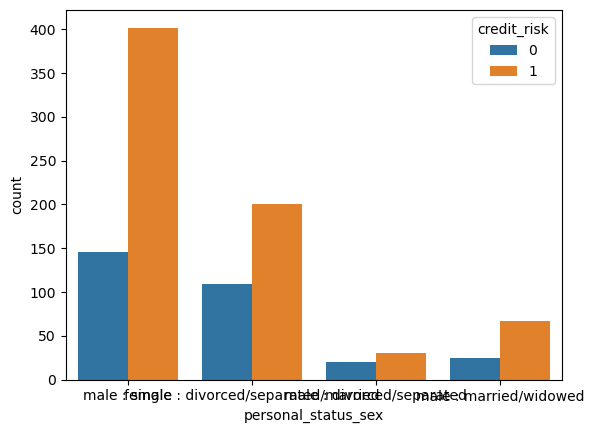

In [55]:
sns.countplot(x= 'personal_status_sex', data = df, hue= 'credit_risk')

In [56]:
df["job"].value_counts()

job
skilled employee/official                                     630
unskilled - resident                                          200
management/self-employed/highly qualified employee/officer    148
unemployed/unskilled - non-resident                            22
Name: count, dtype: int64

<Axes: xlabel='job', ylabel='count'>

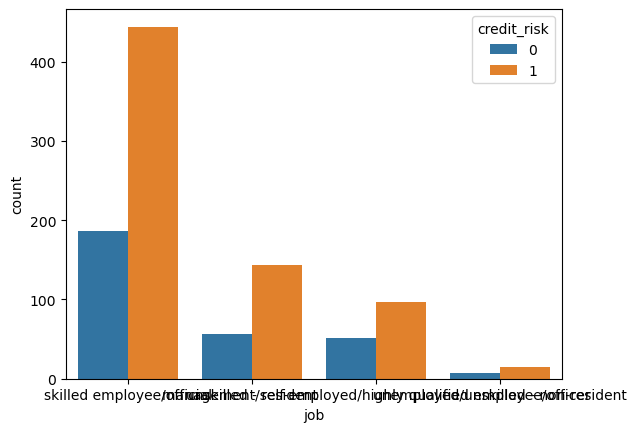

In [57]:
sns.countplot(x= 'job', data = df, hue= 'credit_risk')

In [58]:
df["purpose"].value_counts()

purpose
domestic appliances    280
car (new)              234
radio/television       181
car (used)             103
others                  97
retraining              50
education               22
repairs                 12
furniture/equipment     12
business                 9
Name: count, dtype: int64

<Axes: xlabel='purpose', ylabel='count'>

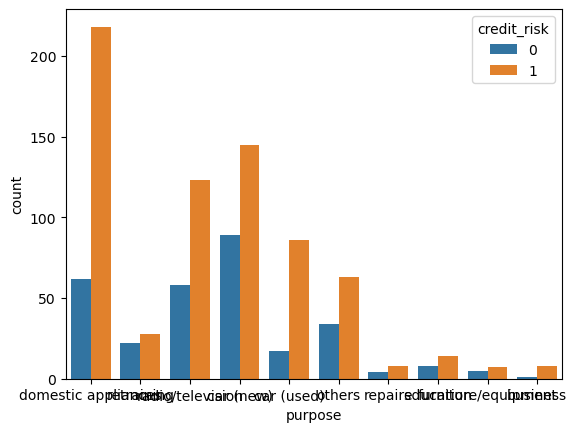

In [59]:
sns.countplot(x= 'purpose', data = df, hue= 'credit_risk')

In [60]:
df["other_installment_plans"].value_counts()

other_installment_plans
none      814
bank      139
stores     47
Name: count, dtype: int64

<Axes: xlabel='other_installment_plans', ylabel='count'>

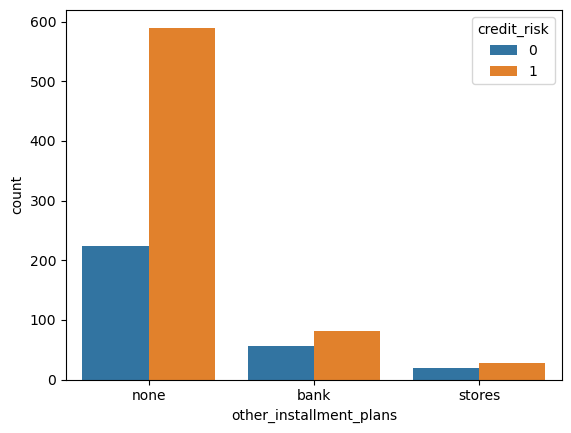

In [61]:
sns.countplot(x= 'other_installment_plans', data = df, hue= 'credit_risk')

In [62]:
df["foreign_worker"].value_counts()

foreign_worker
yes    963
no      37
Name: count, dtype: int64

<Axes: xlabel='foreign_worker', ylabel='count'>

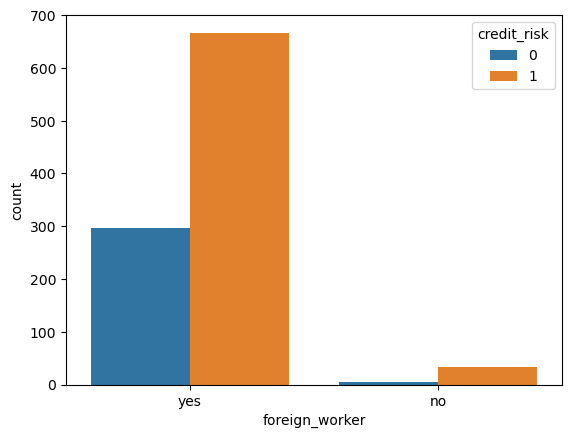

In [63]:
sns.countplot(x= 'foreign_worker', data = df, hue= 'credit_risk')

In [64]:
df["savings"].value_counts()

savings
... < 100 DM                  603
unknown/no savings account    183
100 <= ... < 500 DM           103
500 <= ... < 1000 DM           63
... >= 1000 DM                 48
Name: count, dtype: int64

<Axes: xlabel='savings', ylabel='count'>

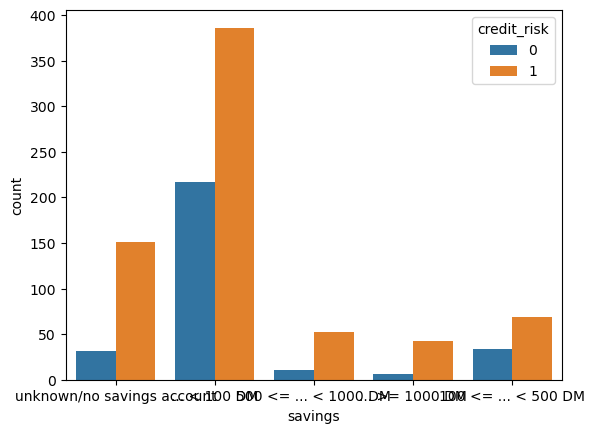

In [65]:
sns.countplot(x= 'savings', data = df, hue= 'credit_risk')

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le=LabelEncoder()

In [68]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])

In [69]:
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,6,1,3,1169,4,1,4,3,2,...,2,67,1,1,2,1,1,1,1,1
1,2,48,3,3,5951,0,2,2,0,2,...,2,22,1,1,1,1,1,0,1,0
2,3,12,1,9,2096,0,3,2,3,2,...,2,49,1,1,1,3,2,0,1,1
3,0,42,3,7,7882,0,3,2,3,1,...,0,45,1,0,1,1,2,0,1,1
4,0,24,2,1,4870,0,2,3,3,2,...,3,53,1,0,2,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,3,7,1736,0,3,3,0,2,...,2,31,1,1,1,3,1,0,1,1
996,0,30,3,2,3857,0,2,4,1,2,...,0,40,1,1,1,0,1,1,1,1
997,3,12,3,3,804,0,1,4,3,2,...,1,38,1,1,1,1,1,0,1,1
998,0,45,3,3,1845,0,2,4,3,2,...,3,23,1,0,1,1,1,1,1,0


In [70]:
x=df.iloc[:,:-1]  #independent
y= df["credit_risk"]     #dependent

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=34)

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [103]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()
clf3=RandomForestClassifier()

In [104]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
clf3.fit(x_train,y_train)

C:\Users\hp1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [105]:
y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)
y_pred3=clf3.predict(x_test)

In [106]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import *
print("Accuracy of Logistic regression:",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Tree:",accuracy_score(y_test,y_pred2))
print("Accuracy of Random Forest:",accuracy_score(y_test,y_pred3))

Accuracy of Logistic regression: 0.72
Accuracy of Decision Tree: 0.635
Accuracy of Random Forest: 0.74


Logistic Regression Confusion Metrix

                 predicted negative  predicted positive
actual negative                  22                  46
actual positive                  10                 122


<Axes: >

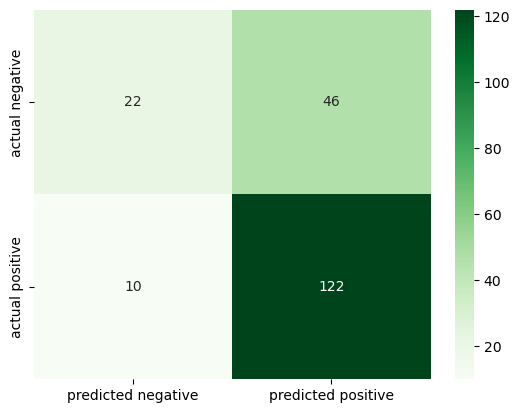

In [99]:
print("Logistic Regression Confusion Metrix\n")
cm=confusion_matrix(y_test,y_pred1)
cm=pd.DataFrame(cm,
               index=['actual negative','actual positive'],
               columns=['predicted negative','predicted positive'])
print(cm)
sns.heatmap(cm,cmap="Greens",annot=True,fmt="d")

Decision Tree Confusion Metrix

                 predicted negative  predicted positive
actual negative                  36                  32
actual positive                  35                  97


<Axes: >

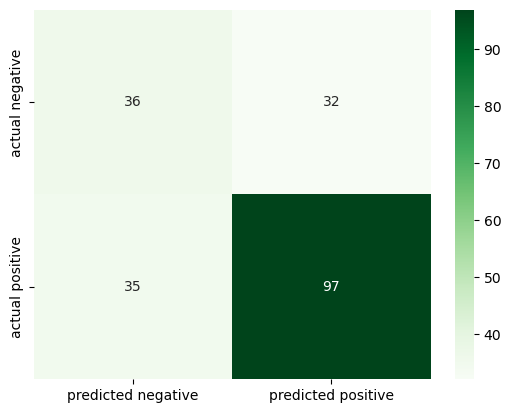

In [100]:
print("Decision Tree Confusion Metrix\n")
cm=confusion_matrix(y_test,y_pred2)
cm=pd.DataFrame(cm,
               index=['actual negative','actual positive'],
               columns=['predicted negative','predicted positive'])
print(cm)
sns.heatmap(cm,cmap="Greens",annot=True,fmt="d")

Random Forest Confusion Metrix

                 predicted negative  predicted positive
actual negative                  27                  41
actual positive                  11                 121


<Axes: >

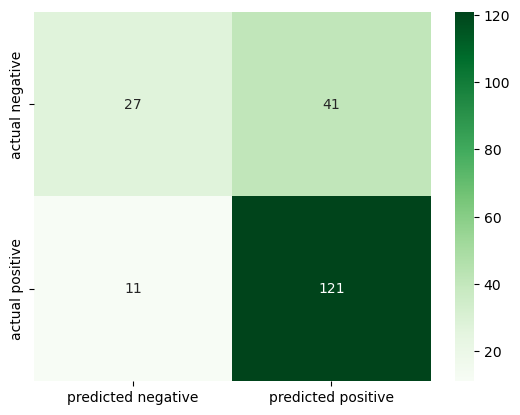

In [107]:
print("Random Forest Confusion Metrix\n")
cm=confusion_matrix(y_test,y_pred3)
cm=pd.DataFrame(cm,
               index=['actual negative','actual positive'],
               columns=['predicted negative','predicted positive'])
print(cm)
sns.heatmap(cm,cmap="Greens",annot=True,fmt="d")

In [112]:
print("For Logistic Regression model\n")
print(classification_report(y_test,y_pred1))

For Logistic Regression model

              precision    recall  f1-score   support

           0       0.69      0.32      0.44        68
           1       0.73      0.92      0.81       132

    accuracy                           0.72       200
   macro avg       0.71      0.62      0.63       200
weighted avg       0.71      0.72      0.69       200



In [113]:
print("For Decision Tree model\n")
print(classification_report(y_test,y_pred2))

For Decision Tree model

              precision    recall  f1-score   support

           0       0.46      0.44      0.45        68
           1       0.72      0.73      0.73       132

    accuracy                           0.64       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.63      0.64      0.63       200



In [114]:
print("For Random Forest model\n")
print(classification_report(y_test,y_pred3))

For Random Forest model

              precision    recall  f1-score   support

           0       0.71      0.40      0.51        68
           1       0.75      0.92      0.82       132

    accuracy                           0.74       200
   macro avg       0.73      0.66      0.67       200
weighted avg       0.73      0.74      0.72       200




# Logistics Regression

In [154]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.512160
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            credit_risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      980
Method:                           MLE   Df Model:                           19
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.1616
Time:                        16:53:52   Log-Likelihood:                -512.16
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 1.115e-31
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
status                      0.5536      0.065      8.517      0.000       0.426   

The p-values for most of the variables are very high, therefore, most of them are insignificant to the model. Therefore, we'll remove them.

In [162]:
cols=['status','duration','amount','savings','employment_duration','installment_rate','personal_status_sex','age','other_installment_plans'] 
x=x[cols]


In [163]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.516084
         Iterations 6
                            Results: Logit
Model:                Logit              Method:             MLE       
Dependent Variable:   credit_risk        Pseudo R-squared:   0.155     
Date:                 2024-09-29 17:35   AIC:                1050.1681 
No. Observations:     1000               BIC:                1094.3379 
Df Model:             8                  Log-Likelihood:     -516.08   
Df Residuals:         991                LL-Null:            -610.86   
Converged:            1.0000             LLR p-value:        1.0076e-36
No. Iterations:       6.0000             Scale:              1.0000    
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
status                   0.5432   0.0622  8.7278 0.0000  0.4212

In [167]:
clf1=LogisticRegression()
clf1.fit(x_train,y_train)

C:\Users\hp1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [168]:
print("Accuracy of Logistic regression:",accuracy_score(y_test,y_pred1))

Accuracy of Logistic regression: 0.72


Cross Validation for Logistic regression

In [164]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\hp1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

10-fold cross validation average accuracy: 0.743


C:\Users\hp1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC Curve

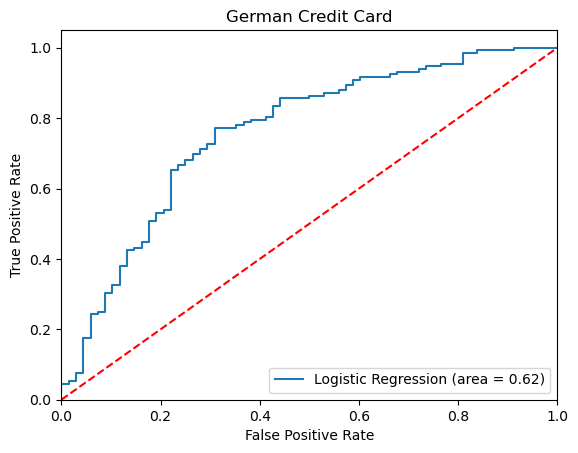

In [165]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf1.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf1.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('German Credit Card')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Tree

In [146]:
clf2 = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=42)  # Using 'entropy' as criterion

clf2.fit(x,y)

DecisionTreeClassifier(max_depth=3, random_state=42)

Decision Tree of Credit Card


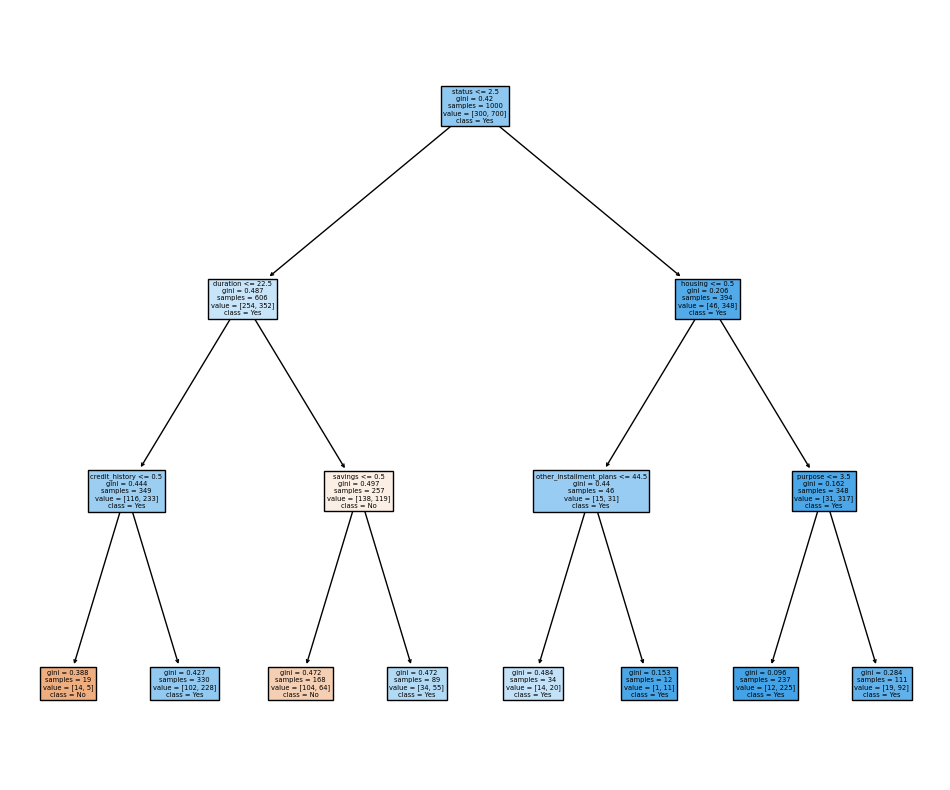

In [147]:
print("Decision Tree of Credit Card")
plt.figure(figsize=(12,10))
tree.plot_tree(clf2, feature_names=['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','property','age','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker'], 
               class_names=['No', 'Yes'], filled=True)
# Save the plot as an image file (e.g., PNG format)
plt.savefig("decision_tree_plot.png")
plt.show()

[Text(0.5, 0.875, 'x[0] <= 2.5\ngini = 0.42\nsamples = 1000\nvalue = [300, 700]'),
 Text(0.25, 0.625, 'x[1] <= 22.5\ngini = 0.487\nsamples = 606\nvalue = [254, 352]'),
 Text(0.125, 0.375, 'x[2] <= 0.5\ngini = 0.444\nsamples = 349\nvalue = [116, 233]'),
 Text(0.0625, 0.125, 'gini = 0.388\nsamples = 19\nvalue = [14, 5]'),
 Text(0.1875, 0.125, 'gini = 0.427\nsamples = 330\nvalue = [102, 228]'),
 Text(0.375, 0.375, 'x[5] <= 0.5\ngini = 0.497\nsamples = 257\nvalue = [138, 119]'),
 Text(0.3125, 0.125, 'gini = 0.472\nsamples = 168\nvalue = [104, 64]'),
 Text(0.4375, 0.125, 'gini = 0.472\nsamples = 89\nvalue = [34, 55]'),
 Text(0.75, 0.625, 'x[13] <= 0.5\ngini = 0.206\nsamples = 394\nvalue = [46, 348]'),
 Text(0.625, 0.375, 'x[12] <= 44.5\ngini = 0.44\nsamples = 46\nvalue = [15, 31]'),
 Text(0.5625, 0.125, 'gini = 0.484\nsamples = 34\nvalue = [14, 20]'),
 Text(0.6875, 0.125, 'gini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.875, 0.375, 'x[3] <= 3.5\ngini = 0.162\nsamples = 348\nvalue = [

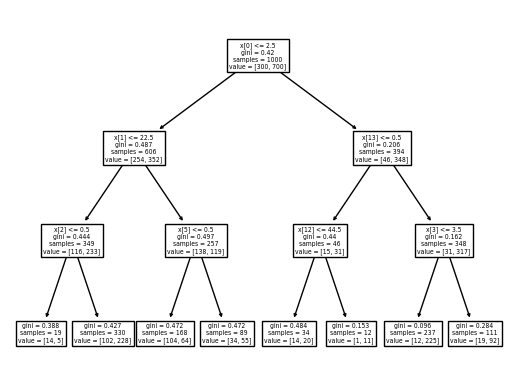

In [172]:
tree.plot_tree(clf2)

In [174]:
print('Training set score: {:.4f}'.format(clf2.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf2.score(x_test, y_test)))

Training set score: 0.7425
Test set score: 0.7750


# Random Forest

In [116]:
n=[50,100,150,200,250,300,350,400,450,500,550,600,650,700]

In [117]:
for X in n:
    model=RandomForestClassifier(n_estimators=X,random_state=23)    
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(y_test,pred)*100
    print("no.of Trees=",X,"accuracy=",acc)

no.of Trees= 50 accuracy= 74.0
no.of Trees= 100 accuracy= 73.5
no.of Trees= 150 accuracy= 75.5
no.of Trees= 200 accuracy= 75.0
no.of Trees= 250 accuracy= 76.0
no.of Trees= 300 accuracy= 76.0
no.of Trees= 350 accuracy= 75.0
no.of Trees= 400 accuracy= 75.5
no.of Trees= 450 accuracy= 76.0
no.of Trees= 500 accuracy= 75.0
no.of Trees= 550 accuracy= 74.0
no.of Trees= 600 accuracy= 74.0
no.of Trees= 650 accuracy= 74.5
no.of Trees= 700 accuracy= 75.0


In [120]:
param_grid = {
    "n_estimators" : [250,300,450],
  "max_depth" : [None,5,10],
  "min_samples_split" : [2,5,10],
  "min_samples_leaf" : [1,2,4],
  "criterion" : ["gini", "entropy" ]
}

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier2 = RandomForestClassifier(random_state = 23)

# Perform grid search using cross validation

grid_search = GridSearchCV(estimator = classifier2, param_grid = param_grid, cv = 2 )
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [250, 300, 450]})

In [130]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [131]:
new_model=RandomForestClassifier(criterion='gini', max_depth= None , min_samples_leaf= 1, min_samples_split= 5, n_estimators= 300,random_state=23)

In [132]:
new_model.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=300, random_state=23)

In [133]:
new_pred=new_model.predict(x_test)

In [134]:
accuracy_score(y_test,new_pred)

0.725